# Tax Document Processing: Pattern Recognition Analysis

This notebook provides comprehensive pattern recognition analysis for the AI-powered tax document processing system. We'll analyze transaction patterns, user demographics, seasonal trends, clustering, and deduction opportunities to generate actionable insights for tax optimization.

## Objectives
- Identify meaningful patterns in historical tax data
- Analyze demographic correlations with spending behavior
- Discover seasonal spending trends
- Perform user clustering analysis
- Identify deduction opportunities
- Generate insights for personalized tax optimization

In [21]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import json
from pathlib import Path
import sys

# Add src to path for imports
src_path = Path('./src')
sys.path.append(str(src_path))

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [22]:
# Load Data
print("📊 Loading CSV data...")

# Load transaction data
transactions_df = pd.read_csv('data/csv/transactions.csv')
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

# Load user data
users_df = pd.read_csv('data/csv/users.csv')

# Load tax filings data
tax_filings_df = pd.read_csv('data/csv/tax_filings.csv')
tax_filings_df['filing_date'] = pd.to_datetime(tax_filings_df['filing_date'])

print(f"📈 Loaded:")
print(f"  - {len(transactions_df)} transactions")
print(f"  - {len(users_df)} users")
print(f"  - {len(tax_filings_df)} tax filings")

# Display basic info
print("\n🔍 Data Overview:")
print(f"Transaction date range: {transactions_df['transaction_date'].min()} to {transactions_df['transaction_date'].max()}")
print(f"Total transaction amount: €{transactions_df['amount'].sum():,.2f}")
print(f"Average transaction: €{transactions_df['amount'].mean():.2f}")

📊 Loading CSV data...
📈 Loaded:
  - 1044 transactions
  - 20 users
  - 40 tax filings

🔍 Data Overview:
Transaction date range: 2022-01-05 00:00:00 to 2023-12-31 00:00:00
Total transaction amount: €354,912.99
Average transaction: €339.95


In [23]:
# Data Exploration
print("🔎 Data Structure Analysis\n")

# Transaction data structure
print("📋 Transactions DataFrame:")
print(transactions_df.info())
print("\nFirst 5 transactions:")
display(transactions_df.head())

print("\n📊 Transaction Statistics:")
display(transactions_df.describe())

print("\n🏷️ Categories:")
print(f"Unique categories: {transactions_df['category'].nunique()}")
print(transactions_df['category'].value_counts())

🔎 Data Structure Analysis

📋 Transactions DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1044 non-null   object        
 1   user_id           1044 non-null   object        
 2   transaction_date  1044 non-null   datetime64[ns]
 3   amount            1044 non-null   float64       
 4   category          1044 non-null   object        
 5   subcategory       1044 non-null   object        
 6   description       1044 non-null   object        
 7   vendor            1044 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 65.4+ KB
None

First 5 transactions:


,transaction_id,user_id,transaction_date,amount,category,subcategory,description,vendor
0,T00800,U1013,2022-03-10,450.0,Work Equipment,Computer,Development accessories,ElectronicsStore
1,T00801,U1013,2022-05-18,48.0,Medical,Doctor Visit,Routine checkup,Dr. Fischer
2,T00802,U1013,2022-11-12,52.0,Medical,Doctor Visit,Routine checkup,Dr. Fischer
3,T00803,U1013,2022-08-15,850.0,Professional Development,Course,Web development workshop,CodeSchool
4,T00804,U1013,2022-12-15,300.0,Charitable Donations,Technology,Year-end donation,TechForAll



📊 Transaction Statistics:


,transaction_date,amount
count,1044,1044.000000
mean,2022-12-10 10:16:33.103448320,339.954971
min,2022-01-05 00:00:00,35.000000
25%,2022-06-05 00:00:00,65.000000
50%,2022-12-15 00:00:00,95.000000
75%,2023-06-07 00:00:00,555.000000
max,2023-12-31 00:00:00,2200.000000
std,NaN,413.189774



🏷️ Categories:
Unique categories: 14
category
Transportation              345
Child Care                  200
Medical                     114
Business Meals               96
Self-Employment              71
Rental                       48
Work Equipment               32
Professional Development     30
Home Office                  26
Property Expenses            26
Travel                       20
Charitable Donations         18
Work Clothing                16
Insurance                     2
Name: count, dtype: int64


👥 User Demographics Analysis

📋 Users DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              20 non-null     object
 1   occupation_category  20 non-null     object
 2   age_range            20 non-null     object
 3   family_status        20 non-null     object
 4   region               20 non-null     object
dtypes: object(5)
memory usage: 932.0+ bytes
None

First 5 users:


,user_id,occupation_category,age_range,family_status,region
0,U1001,IT Professional,30-40,Single,Berlin
1,U1002,Self-Employed,40-50,Married no children,Munich
2,U1003,Education,30-40,Married with children,Hamburg
3,U1004,Healthcare,50-60,Single,Munich
4,U1005,Finance,40-50,Married with children,Frankfurt


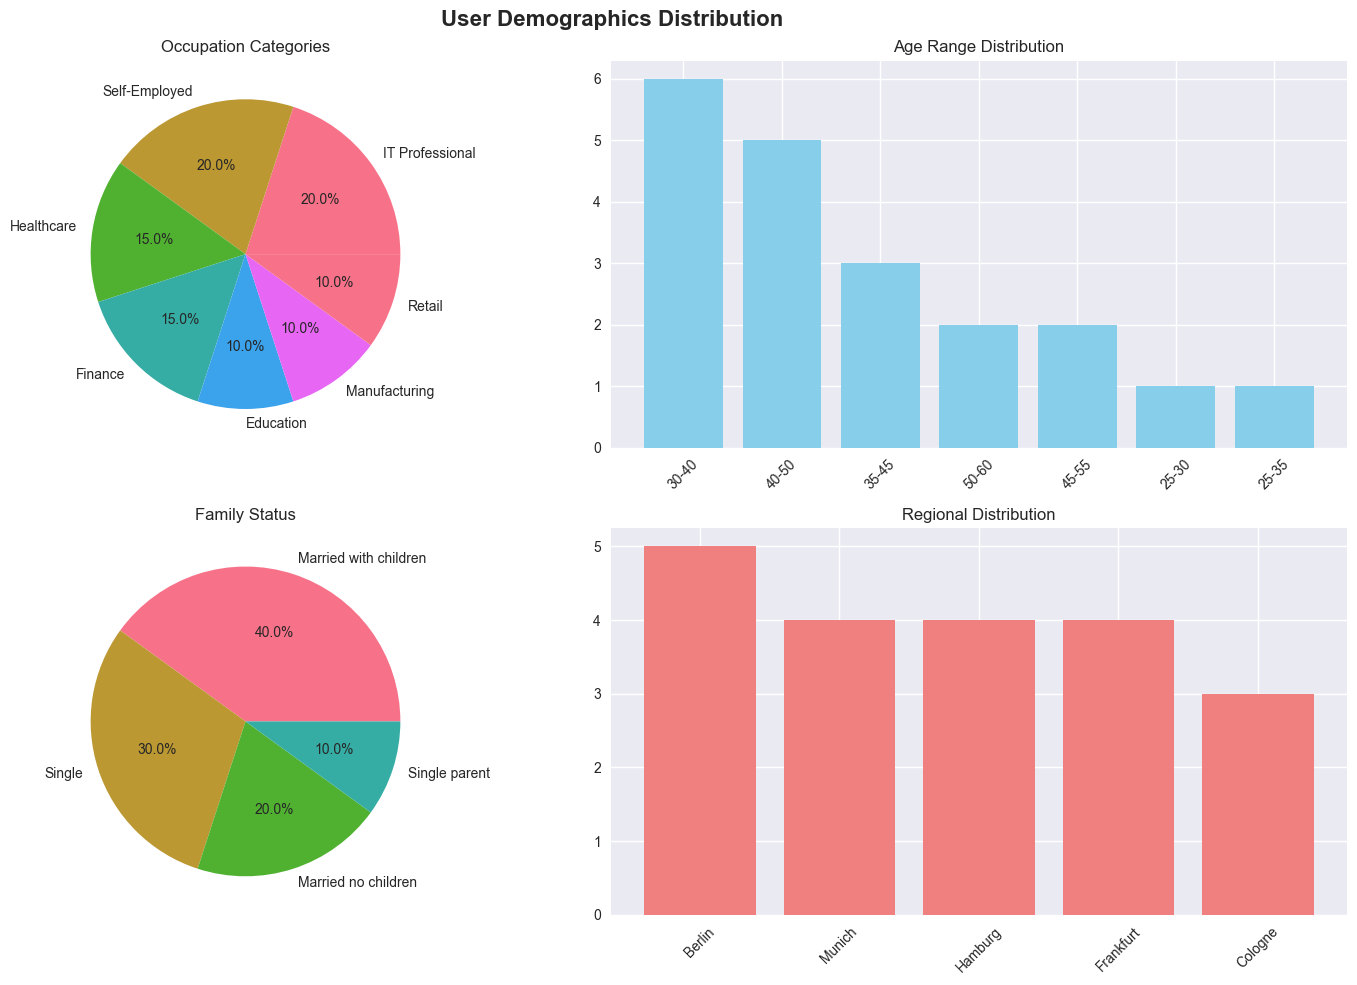


📊 Demographics Summary:

Occupation Category:
occupation_category
IT Professional    4
Self-Employed      4
Healthcare         3
Finance            3
Education          2
Manufacturing      2
Retail             2
Name: count, dtype: int64

Age Range:
age_range
30-40    6
40-50    5
35-45    3
50-60    2
45-55    2
25-30    1
25-35    1
Name: count, dtype: int64

Family Status:
family_status
Married with children    8
Single                   6
Married no children      4
Single parent            2
Name: count, dtype: int64

Region:
region
Berlin       5
Munich       4
Hamburg      4
Frankfurt    4
Cologne      3
Name: count, dtype: int64


In [24]:
# User Demographics Analysis
print("👥 User Demographics Analysis\n")

print("📋 Users DataFrame:")
print(users_df.info())
print("\nFirst 5 users:")
display(users_df.head())

# Demographics breakdown
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('User Demographics Distribution', fontsize=16, fontweight='bold')

# Occupation distribution
occupation_counts = users_df['occupation_category'].value_counts()
axes[0, 0].pie(occupation_counts.values, labels=occupation_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Occupation Categories')

# Age range distribution
age_counts = users_df['age_range'].value_counts()
axes[0, 1].bar(age_counts.index, age_counts.values, color='skyblue')
axes[0, 1].set_title('Age Range Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Family status distribution
family_counts = users_df['family_status'].value_counts()
axes[1, 0].pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Family Status')

# Regional distribution
region_counts = users_df['region'].value_counts()
axes[1, 1].bar(region_counts.index, region_counts.values, color='lightcoral')
axes[1, 1].set_title('Regional Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 Demographics Summary:")
for col in ['occupation_category', 'age_range', 'family_status', 'region']:
    print(f"\n{col.replace('_', ' ').title()}:")
    print(users_df[col].value_counts())

🏷️ Transaction Category Analysis

📊 Category Statistics:


,Transaction_Count,Total_Amount,Avg_Amount,Std_Amount,Unique_Users,Unique_Vendors
category,,,,,,
Self-Employment,71,95930.00,1351.13,303.06,3,15
Child Care,200,92190.00,460.95,228.54,7,11
Rental,48,52680.00,1097.50,130.86,1,2
Professional Development,30,24570.00,819.00,458.25,10,10
Transportation,345,23383.76,67.78,36.87,14,6
Work Equipment,32,13839.98,432.50,94.43,6,6
Medical,114,11805.00,103.55,49.11,11,13
Travel,20,9440.00,472.00,336.75,1,3
Charitable Donations,18,7740.00,430.00,62.97,9,8


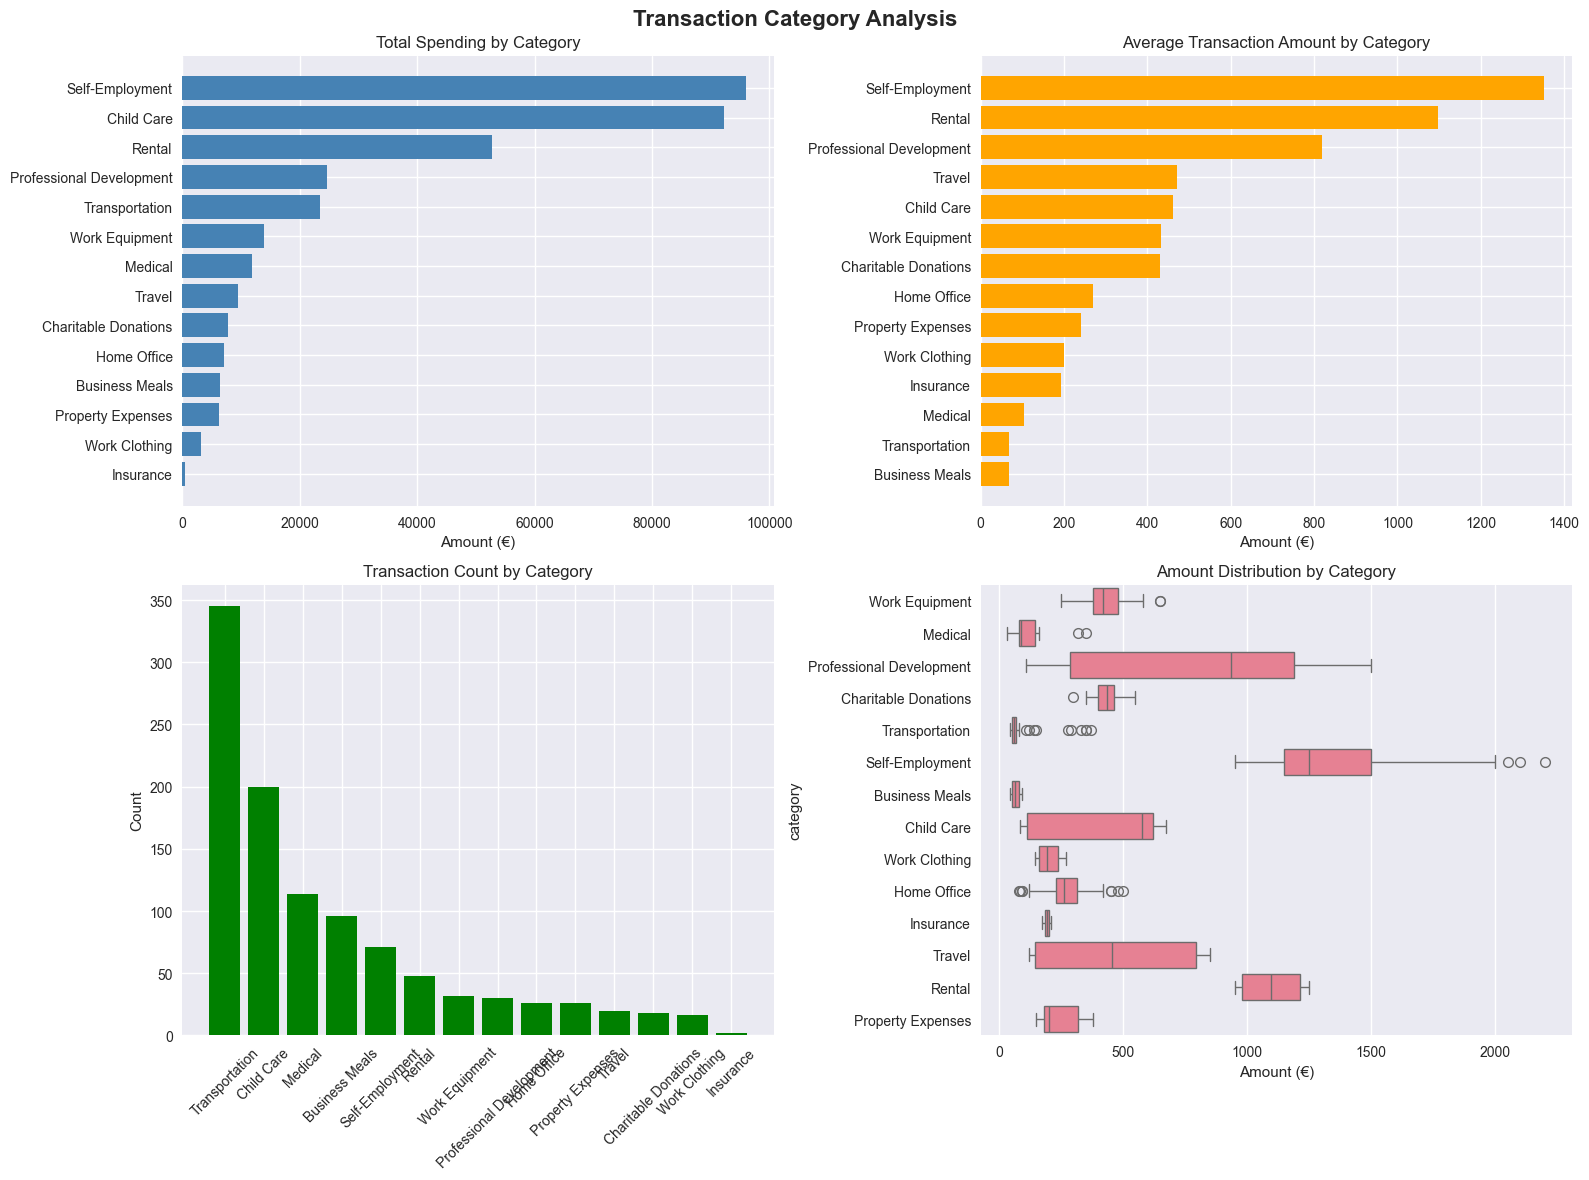

In [25]:
# Transaction Category Analysis
print("🏷️ Transaction Category Analysis\n")

# Category spending summary
category_analysis = transactions_df.groupby('category').agg({
    'amount': ['count', 'sum', 'mean', 'std'],
    'user_id': 'nunique',
    'vendor': 'nunique'
}).round(2)

category_analysis.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Unique_Users', 'Unique_Vendors']
category_analysis = category_analysis.sort_values('Total_Amount', ascending=False)

print("📊 Category Statistics:")
display(category_analysis)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Transaction Category Analysis', fontsize=16, fontweight='bold')

# Total spending by category
category_totals = transactions_df.groupby('category')['amount'].sum().sort_values()
axes[0, 0].barh(category_totals.index, category_totals.values, color='steelblue')
axes[0, 0].set_title('Total Spending by Category')
axes[0, 0].set_xlabel('Amount (€)')

# Average transaction amount by category
category_avg = transactions_df.groupby('category')['amount'].mean().sort_values()
axes[0, 1].barh(category_avg.index, category_avg.values, color='orange')
axes[0, 1].set_title('Average Transaction Amount by Category')
axes[0, 1].set_xlabel('Amount (€)')

# Transaction count by category
category_counts = transactions_df['category'].value_counts()
axes[1, 0].bar(category_counts.index, category_counts.values, color='green')
axes[1, 0].set_title('Transaction Count by Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot of amount distribution by category
sns.boxplot(data=transactions_df, y='category', x='amount', ax=axes[1, 1])
axes[1, 1].set_title('Amount Distribution by Category')
axes[1, 1].set_xlabel('Amount (€)')

plt.tight_layout()
plt.show()

📅 Seasonal and Temporal Patterns Analysis

📊 Monthly Spending Patterns:


,month,month_name,sum,count,mean
0,1,January,39462.97,122,323.466967
1,2,February,33126.97,95,348.704947
2,3,March,33586.73,96,349.861771
3,4,April,26634.23,80,332.927875
4,5,May,31422.73,98,320.640102
5,6,June,26993.98,87,310.275632
6,7,July,26433.48,76,347.808947
7,8,August,27448.23,78,351.900385
8,9,September,27260.73,76,358.693816
9,10,October,23457.98,66,355.423939


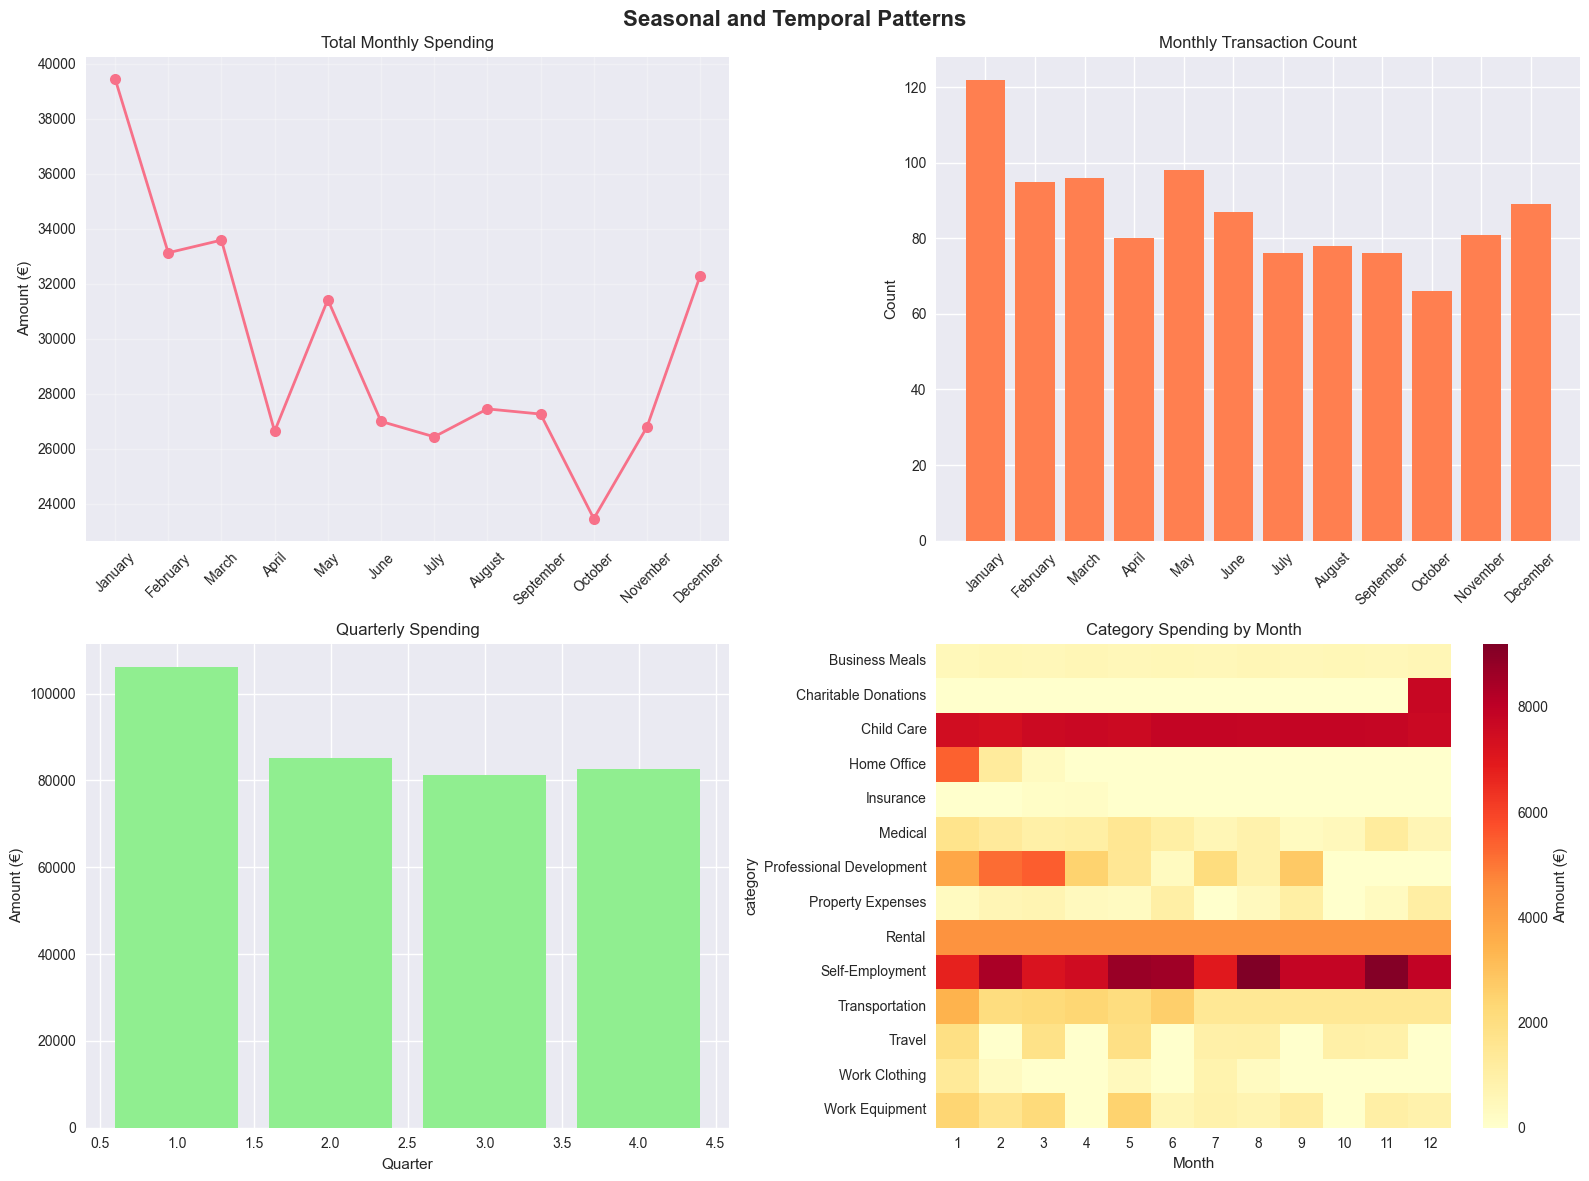


🎄 Year-End Spending Analysis:
December total spending: €32,293.48
December charitable donations: €7,740.00
Percentage of annual charitable giving in December: 100.0%


In [26]:
# Seasonal and Temporal Patterns Analysis
print("📅 Seasonal and Temporal Patterns Analysis\n")

# Add time features
transactions_df['year'] = transactions_df['transaction_date'].dt.year
transactions_df['month'] = transactions_df['transaction_date'].dt.month
transactions_df['quarter'] = transactions_df['transaction_date'].dt.quarter
transactions_df['month_name'] = transactions_df['transaction_date'].dt.month_name()
transactions_df['weekday'] = transactions_df['transaction_date'].dt.day_name()

# Monthly spending patterns
monthly_spending = transactions_df.groupby(['month', 'month_name'])['amount'].agg(['sum', 'count', 'mean']).reset_index()
monthly_spending = monthly_spending.sort_values('month')

print("📊 Monthly Spending Patterns:")
display(monthly_spending)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Seasonal and Temporal Patterns', fontsize=16, fontweight='bold')

# Monthly total spending
axes[0, 0].plot(monthly_spending['month_name'], monthly_spending['sum'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Total Monthly Spending')
axes[0, 0].set_ylabel('Amount (€)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Monthly transaction count
axes[0, 1].bar(monthly_spending['month_name'], monthly_spending['count'], color='coral')
axes[0, 1].set_title('Monthly Transaction Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Quarterly patterns
quarterly_spending = transactions_df.groupby('quarter')['amount'].agg(['sum', 'count', 'mean'])
axes[1, 0].bar(quarterly_spending.index, quarterly_spending['sum'], color='lightgreen')
axes[1, 0].set_title('Quarterly Spending')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Amount (€)')

# Category spending by month heatmap
category_month = transactions_df.groupby(['category', 'month'])['amount'].sum().unstack(fill_value=0)
sns.heatmap(category_month, cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Amount (€)'})
axes[1, 1].set_title('Category Spending by Month')
axes[1, 1].set_xlabel('Month')

plt.tight_layout()
plt.show()

# Year-end spending analysis
print("\n🎄 Year-End Spending Analysis:")
december_spending = transactions_df[transactions_df['month'] == 12]
charitable_december = december_spending[december_spending['category'] == 'Charitable Donations']

print(f"December total spending: €{december_spending['amount'].sum():,.2f}")
print(f"December charitable donations: €{charitable_december['amount'].sum():,.2f}")
print(f"Percentage of annual charitable giving in December: {(charitable_december['amount'].sum() / transactions_df[transactions_df['category'] == 'Charitable Donations']['amount'].sum() * 100):.1f}%")

👥 Demographic Correlation Analysis

🔗 Data merged successfully
Combined dataset shape: (1044, 17)
💼 Spending by Occupation:


,Total_Spending,Avg_Transaction,Transaction_Count,Unique_Users
occupation_category,,,,
Education,43162.00,282.10,153,2
Finance,65491.00,590.01,111,2
Healthcare,32992.00,219.95,150,2
IT Professional,24276.24,181.17,134,3
Manufacturing,30176.00,290.15,104,2
Retail,21717.00,199.24,109,2
Self-Employed,137098.75,484.45,283,3



👨‍👩‍👧‍👦 Spending by Family Status:


,Total_Spending,Avg_Transaction,Transaction_Count,Unique_Users
family_status,,,,
Married no children,92040.75,424.15,217,3
Married with children,159409.00,374.20,426,6
Single,36688.24,162.34,226,5
Single parent,66775.00,381.57,175,2



🌍 Spending by Region:


,Total_Spending,Avg_Transaction,Transaction_Count,Unique_Users
region,,,,
Berlin,44163.24,184.01,240,5
Cologne,30176.00,290.15,104,2
Frankfurt,120175.00,504.94,238,3
Hamburg,78968.00,347.88,227,3
Munich,81430.75,346.51,235,3


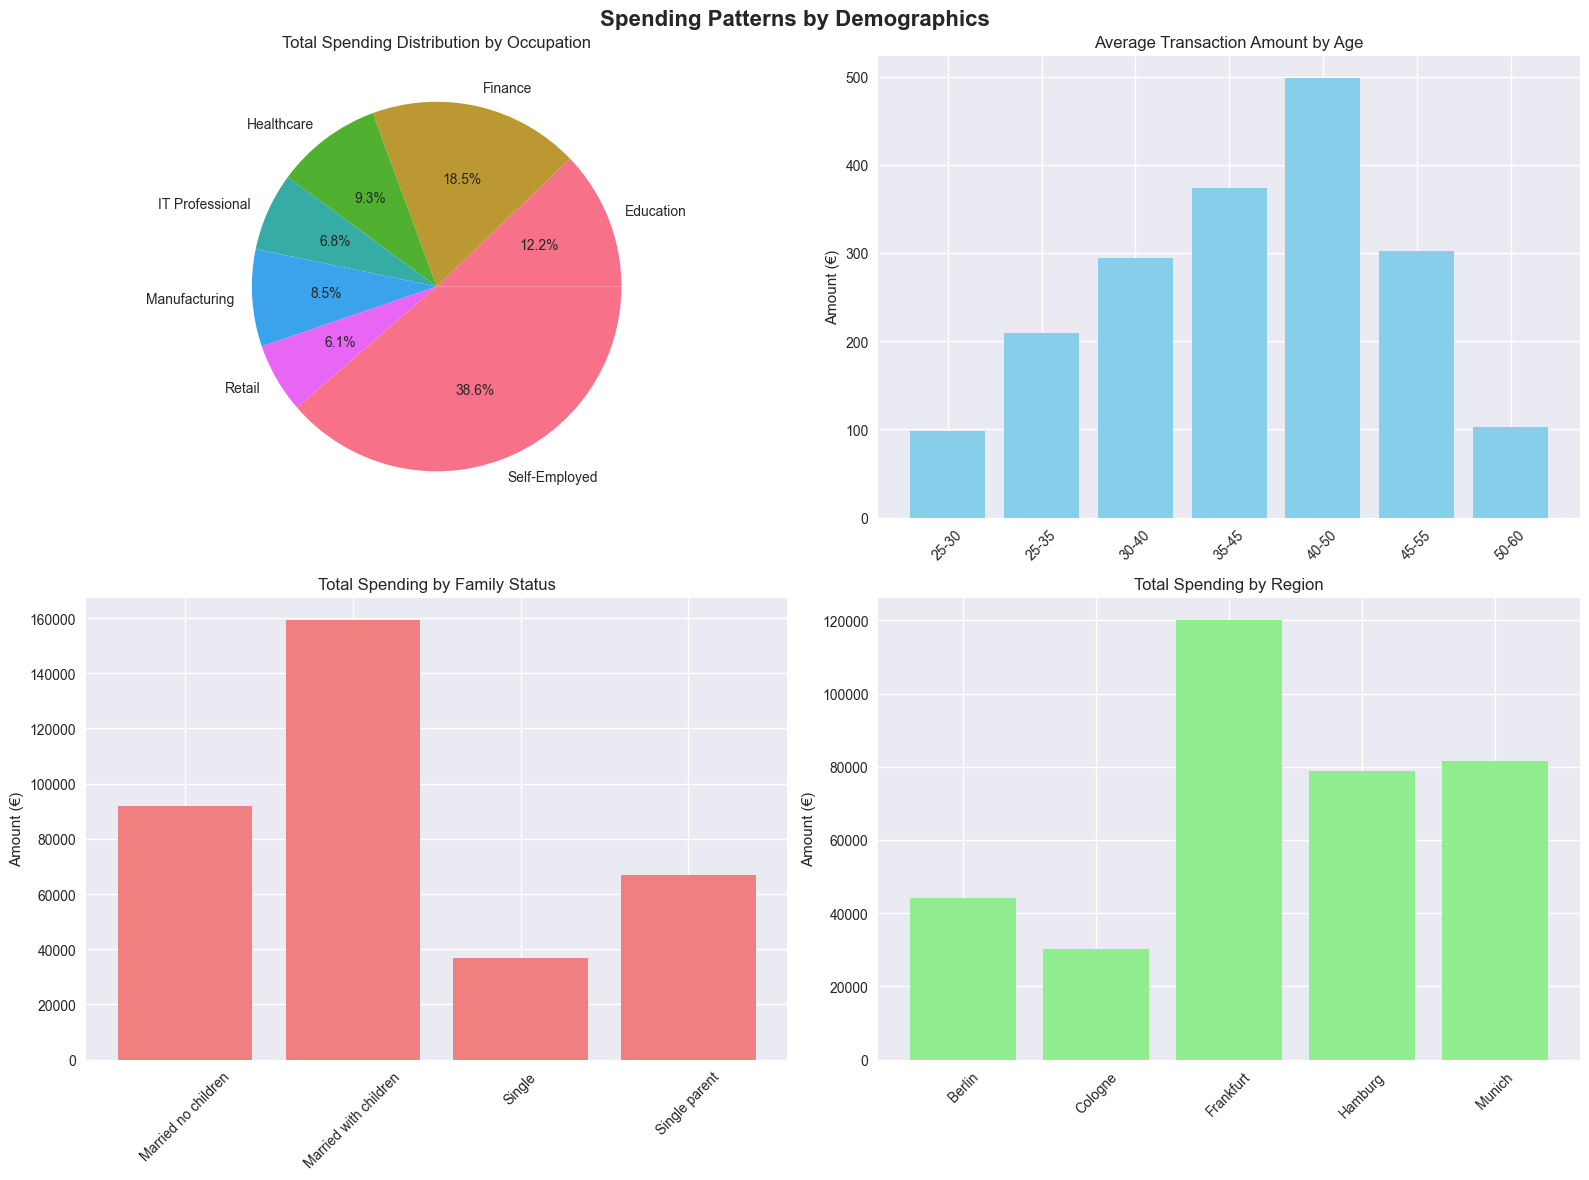

In [27]:
# Demographic Correlation Analysis
print("👥 Demographic Correlation Analysis\n")

# Merge transaction data with user demographics
user_transactions = transactions_df.merge(users_df, on='user_id')
user_tax_data = tax_filings_df.merge(users_df, on='user_id')

print("🔗 Data merged successfully")
print(f"Combined dataset shape: {user_transactions.shape}")

# Spending patterns by demographics
demographic_analysis = {}

# By occupation
occupation_spending = user_transactions.groupby('occupation_category').agg({
    'amount': ['sum', 'mean', 'count'],
    'user_id': 'nunique'
})
occupation_spending.columns = ['Total_Spending', 'Avg_Transaction', 'Transaction_Count', 'Unique_Users']
demographic_analysis['occupation'] = occupation_spending

print("💼 Spending by Occupation:")
display(occupation_spending.round(2))

# By family status
family_spending = user_transactions.groupby('family_status').agg({
    'amount': ['sum', 'mean', 'count'],
    'user_id': 'nunique'
})
family_spending.columns = ['Total_Spending', 'Avg_Transaction', 'Transaction_Count', 'Unique_Users']
demographic_analysis['family_status'] = family_spending

print("\n👨‍👩‍👧‍👦 Spending by Family Status:")
display(family_spending.round(2))

# By region
region_spending = user_transactions.groupby('region').agg({
    'amount': ['sum', 'mean', 'count'],
    'user_id': 'nunique'
})
region_spending.columns = ['Total_Spending', 'Avg_Transaction', 'Transaction_Count', 'Unique_Users']
demographic_analysis['region'] = region_spending

print("\n🌍 Spending by Region:")
display(region_spending.round(2))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Spending Patterns by Demographics', fontsize=16, fontweight='bold')

# Spending by occupation
occupation_totals = user_transactions.groupby('occupation_category')['amount'].sum()
axes[0, 0].pie(occupation_totals.values, labels=occupation_totals.index, autopct='%1.1f%%')
axes[0, 0].set_title('Total Spending Distribution by Occupation')

# Average transaction by age group
age_avg = user_transactions.groupby('age_range')['amount'].mean()
axes[0, 1].bar(age_avg.index, age_avg.values, color='skyblue')
axes[0, 1].set_title('Average Transaction Amount by Age')
axes[0, 1].set_ylabel('Amount (€)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Spending by family status
family_totals = user_transactions.groupby('family_status')['amount'].sum()
axes[1, 0].bar(family_totals.index, family_totals.values, color='lightcoral')
axes[1, 0].set_title('Total Spending by Family Status')
axes[1, 0].set_ylabel('Amount (€)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Regional spending patterns
region_totals = user_transactions.groupby('region')['amount'].sum()
axes[1, 1].bar(region_totals.index, region_totals.values, color='lightgreen')
axes[1, 1].set_title('Total Spending by Region')
axes[1, 1].set_ylabel('Amount (€)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

💰 Tax Analysis and Deduction Patterns

📋 Tax Filings Overview:


,filing_id,user_id,tax_year,filing_date,total_income,total_deductions,refund_amount
0,F00001,U1001,2022,2023-02-15,68500.0,2850.0,980.50
1,F00002,U1002,2022,2023-03-10,72000.0,3100.0,1250.75
2,F00003,U1003,2022,2023-01-20,62000.0,2200.0,780.25
3,F00004,U1004,2022,2023-02-28,75000.0,3250.0,1100.50
4,F00005,U1005,2022,2023-03-25,85000.0,2950.0,950.75


📊 Tax Statistics:
Average income: €71,062.50
Average deductions: €2,852.50
Average deduction rate: 3.99%
Average refund: €1,013.75

🔍 Deduction Gap Analysis:
Users with deduction gaps > €100: 28
Average deduction gap: €1214.44
Total missed deductions: €86,277.48


,user_id,total_income,total_deductions,potential_deductions,deduction_gap,deduction_efficiency
0,U1001,68500.0,2850.0,5374.74,2524.74,53.03
1,U1002,72000.0,3100.0,0.00,-3100.00,inf
2,U1003,62000.0,2200.0,2536.00,336.00,86.75
3,U1004,75000.0,3250.0,7416.00,4166.00,43.82
4,U1005,85000.0,2950.0,0.00,-2950.00,inf
5,U1006,58000.0,1800.0,7560.00,5760.00,23.81
6,U1007,52000.0,1650.0,2218.00,568.00,74.39
7,U1008,79000.0,3050.0,5390.00,2340.00,56.59
8,U1009,67000.0,2750.0,5226.00,2476.00,52.62
9,U1010,70000.0,2800.0,10336.00,7536.00,27.09


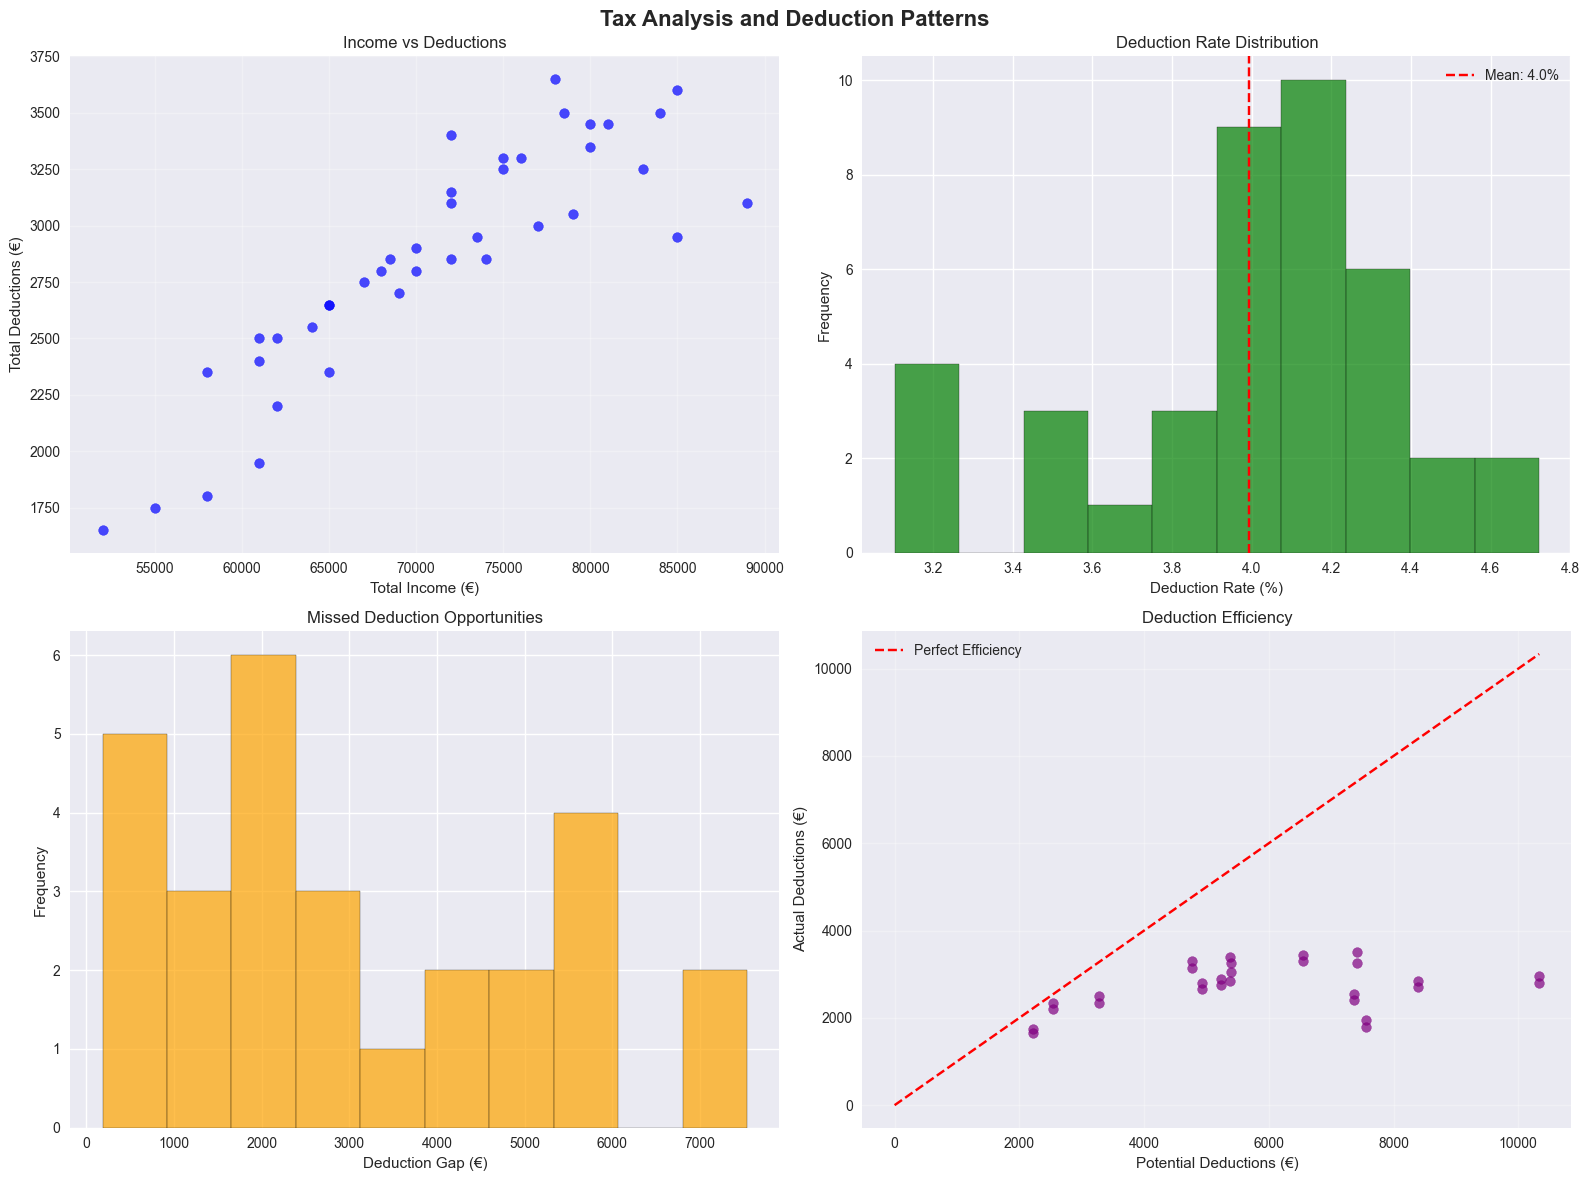

In [28]:
# Tax Analysis and Deduction Patterns
print("💰 Tax Analysis and Deduction Patterns\n")

print("📋 Tax Filings Overview:")
display(tax_filings_df.head())

# Tax efficiency analysis
tax_analysis = tax_filings_df.copy()
tax_analysis['deduction_rate'] = (tax_analysis['total_deductions'] / tax_analysis['total_income']) * 100
tax_analysis['effective_tax_rate'] = ((tax_analysis['total_income'] - tax_analysis['refund_amount']) / tax_analysis['total_income']) * 100

print("📊 Tax Statistics:")
print(f"Average income: €{tax_analysis['total_income'].mean():,.2f}")
print(f"Average deductions: €{tax_analysis['total_deductions'].mean():,.2f}")
print(f"Average deduction rate: {tax_analysis['deduction_rate'].mean():.2f}%")
print(f"Average refund: €{tax_analysis['refund_amount'].mean():,.2f}")

# Deductible categories analysis
deductible_categories = ['Work Equipment', 'Professional Development', 'Medical', 'Charitable Donations', 'Transportation']

# Calculate potential deductions by user
user_deductible_spending = transactions_df[transactions_df['category'].isin(deductible_categories)].groupby('user_id')['amount'].sum().reset_index()
user_deductible_spending.columns = ['user_id', 'potential_deductions']

# Merge with actual tax data
tax_comparison = tax_filings_df.merge(user_deductible_spending, on='user_id', how='left')
tax_comparison['potential_deductions'] = tax_comparison['potential_deductions'].fillna(0)
tax_comparison['deduction_gap'] = tax_comparison['potential_deductions'] - tax_comparison['total_deductions']
tax_comparison['deduction_efficiency'] = (tax_comparison['total_deductions'] / tax_comparison['potential_deductions']).fillna(0) * 100

print("\n🔍 Deduction Gap Analysis:")
print(f"Users with deduction gaps > €100: {len(tax_comparison[tax_comparison['deduction_gap'] > 100])}")
print(f"Average deduction gap: €{tax_comparison['deduction_gap'].mean():.2f}")
print(f"Total missed deductions: €{tax_comparison[tax_comparison['deduction_gap'] > 0]['deduction_gap'].sum():,.2f}")

display(tax_comparison[['user_id', 'total_income', 'total_deductions', 'potential_deductions', 'deduction_gap', 'deduction_efficiency']].round(2))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tax Analysis and Deduction Patterns', fontsize=16, fontweight='bold')

# Income vs Deductions scatter
axes[0, 0].scatter(tax_analysis['total_income'], tax_analysis['total_deductions'], alpha=0.7, color='blue')
axes[0, 0].set_xlabel('Total Income (€)')
axes[0, 0].set_ylabel('Total Deductions (€)')
axes[0, 0].set_title('Income vs Deductions')
axes[0, 0].grid(True, alpha=0.3)

# Deduction rate distribution
axes[0, 1].hist(tax_analysis['deduction_rate'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Deduction Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Deduction Rate Distribution')
axes[0, 1].axvline(tax_analysis['deduction_rate'].mean(), color='red', linestyle='--', label=f'Mean: {tax_analysis["deduction_rate"].mean():.1f}%')
axes[0, 1].legend()

# Deduction gap analysis
positive_gaps = tax_comparison[tax_comparison['deduction_gap'] > 0]
axes[1, 0].hist(positive_gaps['deduction_gap'], bins=10, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Deduction Gap (€)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Missed Deduction Opportunities')

# Deduction efficiency by user
efficient_users = tax_comparison[tax_comparison['potential_deductions'] > 0]
axes[1, 1].scatter(efficient_users['potential_deductions'], efficient_users['total_deductions'], alpha=0.7, color='purple')
axes[1, 1].plot([0, efficient_users['potential_deductions'].max()], [0, efficient_users['potential_deductions'].max()], 'r--', label='Perfect Efficiency')
axes[1, 1].set_xlabel('Potential Deductions (€)')
axes[1, 1].set_ylabel('Actual Deductions (€)')
axes[1, 1].set_title('Deduction Efficiency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎯 User Clustering Analysis

🔧 Creating user feature matrix...
✅ Feature matrix created with 16 users and 28 features


,user_id,total_spending,avg_transaction,spending_volatility,transaction_count,category_diversity,occupation_category,age_range,family_status,region,total_income,total_deductions,pct_business_meals,pct_charitable_donations,pct_child_care,pct_home_office,pct_insurance,pct_medical,pct_professional_development,pct_property_expenses,pct_rental,pct_self-employment,pct_transportation,pct_travel,pct_work_clothing,pct_work_equipment,deduction_rate,spending_rate
0,U1001,6790.24,169.76,286.03,40,6,IT Professional,30-40,Single,Berlin,70250.0,3125.0,0.000000,0.000000,0.000000,15.168831,5.677266,7.437145,39.762954,0.000000,0.000000,0.000000,23.854238,0.000000,0.0,8.099566,4.448399,9.665822
1,U1002,52538.75,571.07,719.03,92,3,Self-Employed,40-50,Married no children,Munich,75000.0,3375.0,4.756013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.276296,0.000000,17.967691,0.0,0.000000,4.500000,70.051667
2,U1003,21686.00,264.46,269.44,82,5,Education,30-40,Married with children,Hamburg,63500.0,2275.0,0.000000,4.841833,84.709029,3.596791,0.000000,1.706170,0.000000,0.000000,0.000000,0.000000,5.146177,0.000000,0.0,0.000000,3.582677,34.151181
3,U1004,7416.00,103.00,38.17,72,2,Healthcare,50-60,Single,Munich,76750.0,3375.0,0.000000,0.000000,0.000000,0.000000,0.000000,78.478964,0.000000,0.000000,0.000000,0.000000,21.521036,0.000000,0.0,0.000000,4.397394,9.662541
4,U1005,58945.00,796.55,427.43,74,2,Finance,40-50,Married with children,Frankfurt,87000.0,3025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.628552,89.371448,0.000000,0.000000,0.000000,0.0,0.000000,3.477011,67.752874



📊 Using 23 numeric features for clustering
Features: ['total_spending', 'avg_transaction', 'spending_volatility', 'transaction_count', 'category_diversity', 'total_income', 'total_deductions', 'pct_business_meals', 'pct_charitable_donations', 'pct_child_care', 'pct_home_office', 'pct_insurance', 'pct_medical', 'pct_professional_development', 'pct_property_expenses', 'pct_rental', 'pct_self-employment', 'pct_transportation', 'pct_travel', 'pct_work_clothing', 'pct_work_equipment', 'deduction_rate', 'spending_rate']
📏 Features standardized. Shape: (16, 23)

🔍 Determining optimal number of clusters...


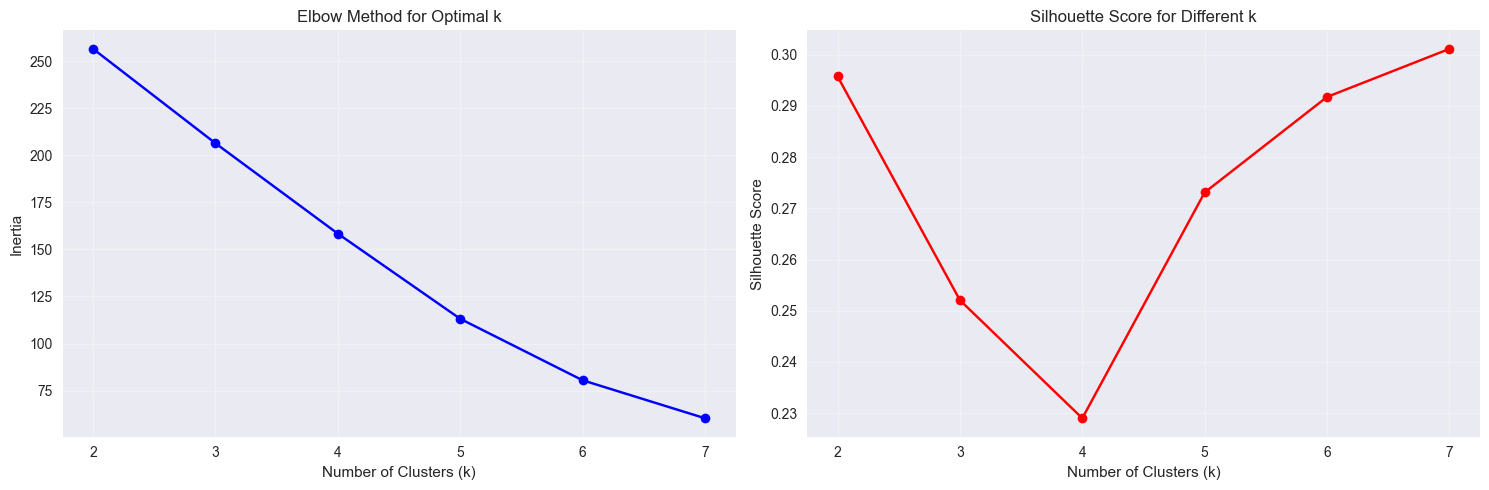


🎯 Optimal number of clusters: 7 (Silhouette Score: 0.301)

✅ Clustering completed. Cluster distribution:
cluster
0    1
1    1
2    3
3    5
4    3
5    1
6    2
Name: count, dtype: int64


In [20]:
# User Clustering Analysis
print("🎯 User Clustering Analysis\n")

# Create user feature matrix for clustering
print("🔧 Creating user feature matrix...")

# User spending patterns
user_spending_features = transactions_df.groupby('user_id').agg({
    'amount': ['sum', 'mean', 'std', 'count'],
    'category': lambda x: len(x.unique())
}).round(2)
user_spending_features.columns = ['total_spending', 'avg_transaction', 'spending_volatility', 'transaction_count', 'category_diversity']
user_spending_features['spending_volatility'] = user_spending_features['spending_volatility'].fillna(0)

# Category spending percentages
category_spending = transactions_df.groupby(['user_id', 'category'])['amount'].sum().unstack(fill_value=0)
category_percentages = category_spending.div(category_spending.sum(axis=1), axis=0) * 100
category_percentages.columns = [f'pct_{col.replace(" ", "_").lower()}' for col in category_percentages.columns]

# Merge with user demographics and tax data (avoid duplicates)
user_features = user_spending_features.reset_index()
user_features = user_features.merge(users_df, on='user_id')

# Get unique tax filings per user (take the latest/first one if multiple exist)
tax_filings_unique = tax_filings_df.groupby('user_id').agg({
    'total_income': 'mean',  # Average if multiple years
    'total_deductions': 'mean'
}).reset_index()

user_features = user_features.merge(tax_filings_unique, on='user_id')
user_features = user_features.merge(category_percentages.reset_index(), on='user_id')

# Add derived features
user_features['deduction_rate'] = (user_features['total_deductions'] / user_features['total_income']) * 100
user_features['spending_rate'] = (user_features['total_spending'] / user_features['total_income']) * 100

# Remove any remaining duplicates by taking the first occurrence
user_features = user_features.drop_duplicates(subset=['user_id'], keep='first')

print(f"✅ Feature matrix created with {len(user_features)} users and {len(user_features.columns)} features")
display(user_features.head())

# Prepare features for clustering
# Keep user_id separate before selecting numeric features
user_ids = user_features['user_id'].copy()
numeric_features = user_features.select_dtypes(include=[np.number])

# Remove user_id if it exists in numeric features (it shouldn't, but just in case)
if 'user_id' in numeric_features.columns:
    numeric_features = numeric_features.drop(columns=['user_id'])

print(f"\n📊 Using {len(numeric_features.columns)} numeric features for clustering")
print(f"Features: {list(numeric_features.columns)}")

# Handle missing values and infinite values
numeric_features = numeric_features.fillna(0)
numeric_features = numeric_features.replace([np.inf, -np.inf], 0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

print(f"📏 Features standardized. Shape: {X_scaled.shape}")

# Determine optimal number of clusters using elbow method
print("\n🔍 Determining optimal number of clusters...")

inertias = []
silhouette_scores = []
K_range = range(2, min(8, len(user_features)))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different k')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n🎯 Optimal number of clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Perform final clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to user features
user_features['cluster'] = cluster_labels

print(f"\n✅ Clustering completed. Cluster distribution:")
print(user_features['cluster'].value_counts().sort_index())

🔍 Cluster Analysis and Interpretation

📊 Cluster Profiles:


,size,avg_income,avg_spending,avg_deduction_rate,avg_transaction_count,dominant_occupation,dominant_family_status,dominant_region
Cluster 0,1,76750.0,7416.0,4.397394,72.0,Healthcare,Single,Munich
Cluster 1,1,70250.0,6790.24,4.448399,40.0,IT Professional,Single,Berlin
Cluster 2,3,73833.333333,45699.583333,4.317004,94.333333,Self-Employed,Married no children,Frankfurt
Cluster 3,5,67750.0,21844.6,3.99784,73.6,Education,Married with children,Berlin
Cluster 4,3,70000.0,8010.666667,3.982211,43.666667,IT Professional,Single,Berlin
Cluster 5,1,87000.0,58945.0,3.477011,74.0,Finance,Married with children,Frankfurt
Cluster 6,2,56500.0,5704.0,3.164415,38.0,Manufacturing,Married no children,Berlin


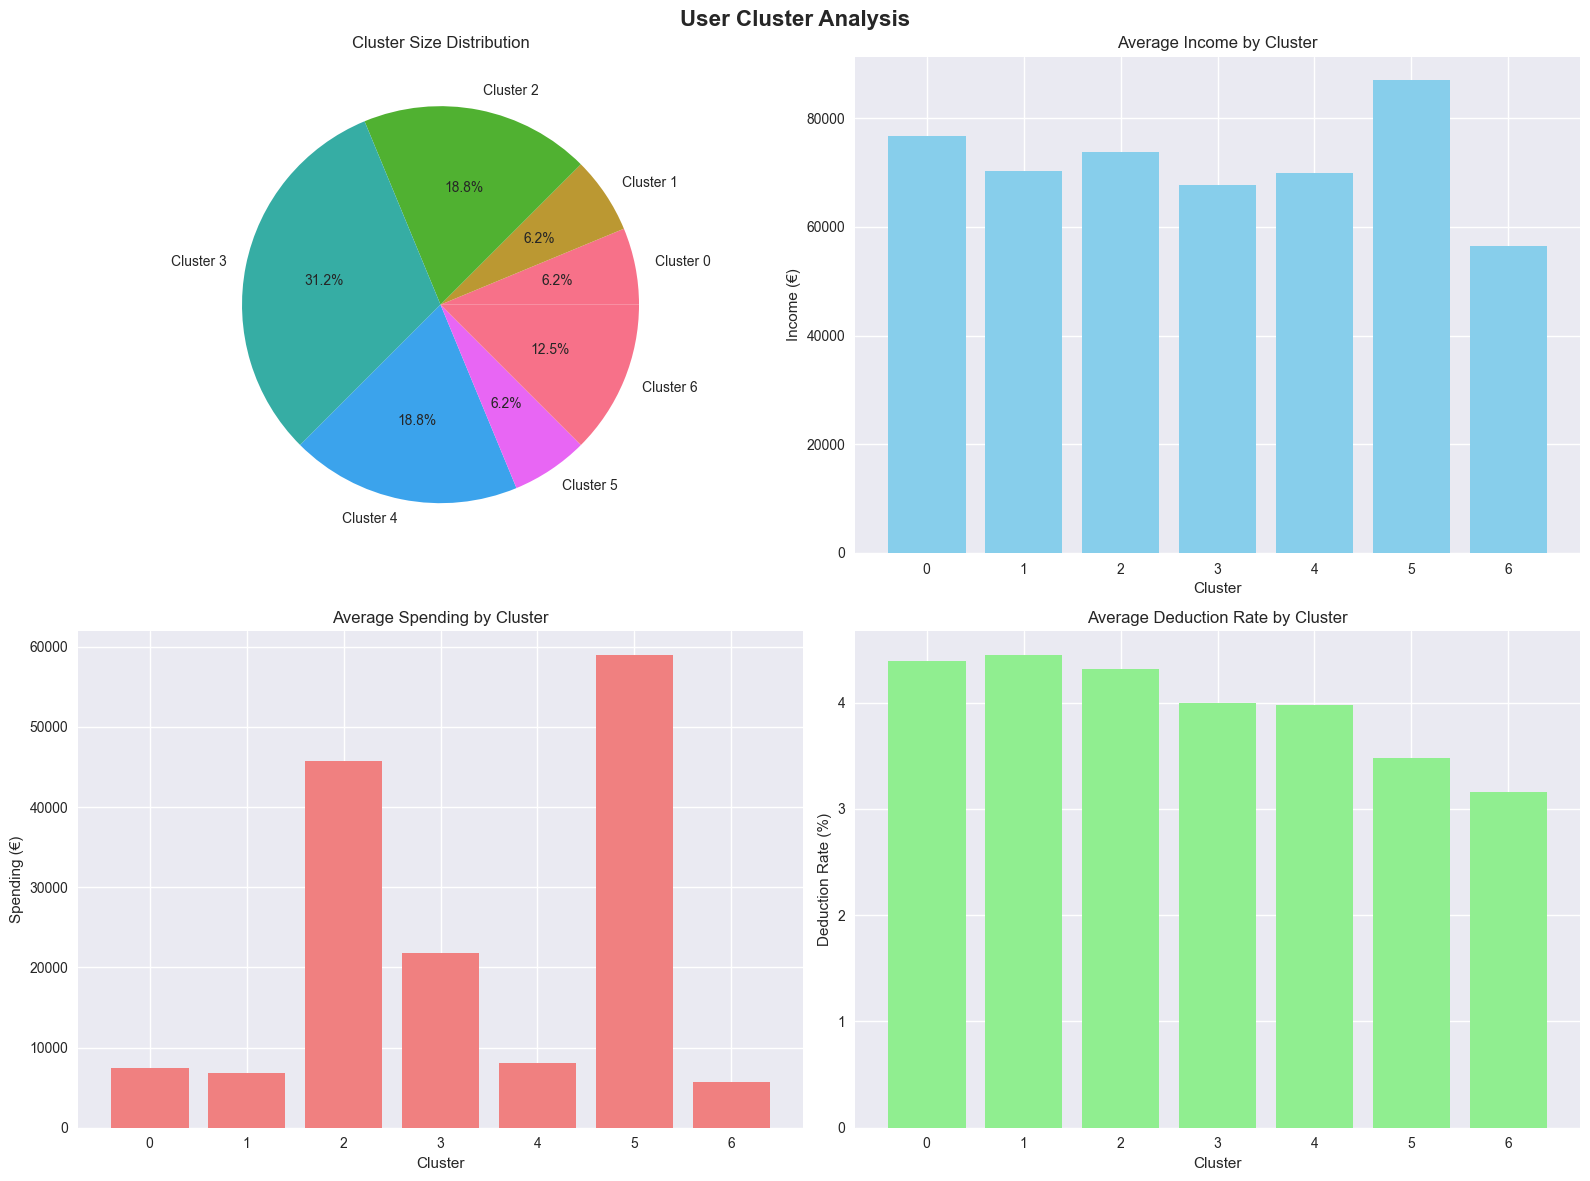


🎨 PCA Visualization of Clusters


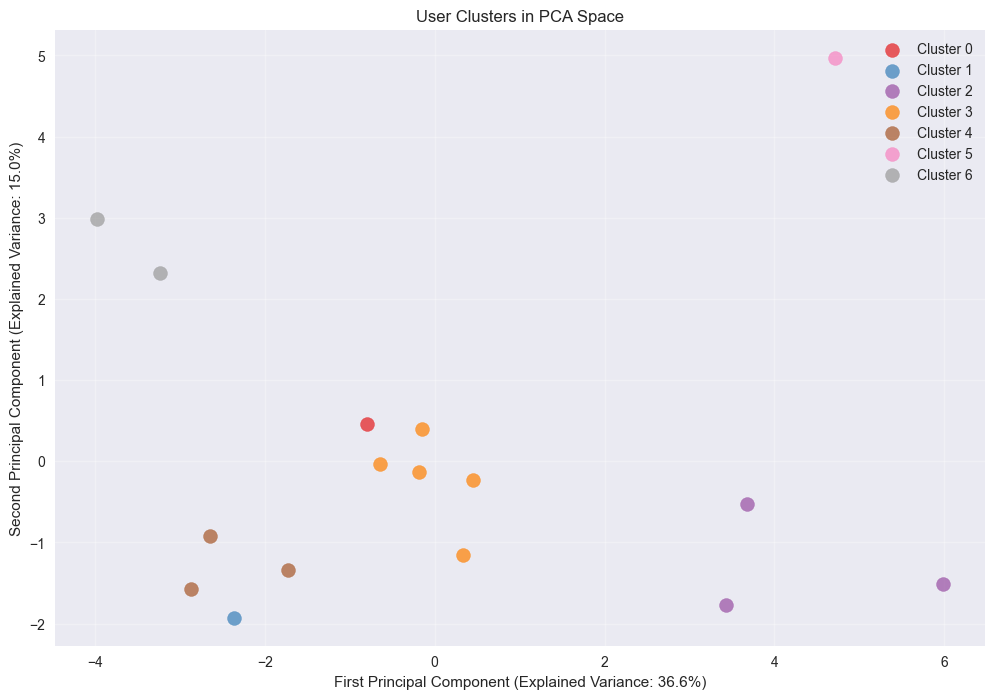

📊 Total explained variance by first 2 components: 51.6%

🎯 Cluster Interpretations:

**Cluster 0:**
  - Size: 1 users (6.2%)
  - Profile: Healthcare professionals
  - Income: €76,750 average
  - Spending: €7,416 average
  - Deduction Rate: 4.4% average
  - Family Status: Mostly Single
  - Region: Primarily Munich

**Cluster 1:**
  - Size: 1 users (6.2%)
  - Profile: IT Professional professionals
  - Income: €70,250 average
  - Spending: €6,790 average
  - Deduction Rate: 4.4% average
  - Family Status: Mostly Single
  - Region: Primarily Berlin

**Cluster 2:**
  - Size: 3 users (18.8%)
  - Profile: Self-Employed professionals
  - Income: €73,833 average
  - Spending: €45,700 average
  - Deduction Rate: 4.3% average
  - Family Status: Mostly Married no children
  - Region: Primarily Frankfurt

**Cluster 3:**
  - Size: 5 users (31.2%)
  - Profile: Education professionals
  - Income: €67,750 average
  - Spending: €21,845 average
  - Deduction Rate: 4.0% average
  - Family Status: Mostly M

In [29]:
# Cluster Analysis and Interpretation
print("🔍 Cluster Analysis and Interpretation\n")

# Analyze clusters
cluster_analysis = {}
for cluster_id in range(optimal_k):
    cluster_users = user_features[user_features['cluster'] == cluster_id]
    
    cluster_profile = {
        'size': len(cluster_users),
        'avg_income': cluster_users['total_income'].mean(),
        'avg_spending': cluster_users['total_spending'].mean(),
        'avg_deduction_rate': cluster_users['deduction_rate'].mean(),
        'avg_transaction_count': cluster_users['transaction_count'].mean(),
        'dominant_occupation': cluster_users['occupation_category'].mode().iloc[0] if not cluster_users['occupation_category'].mode().empty else 'Mixed',
        'dominant_family_status': cluster_users['family_status'].mode().iloc[0] if not cluster_users['family_status'].mode().empty else 'Mixed',
        'dominant_region': cluster_users['region'].mode().iloc[0] if not cluster_users['region'].mode().empty else 'Mixed'
    }
    
    cluster_analysis[f'Cluster {cluster_id}'] = cluster_profile

# Display cluster profiles
cluster_df = pd.DataFrame(cluster_analysis).T
print("📊 Cluster Profiles:")
display(cluster_df.round(2))

# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('User Cluster Analysis', fontsize=16, fontweight='bold')

# Cluster sizes
cluster_sizes = user_features['cluster'].value_counts().sort_index()
axes[0, 0].pie(cluster_sizes.values, labels=[f'Cluster {i}' for i in cluster_sizes.index], autopct='%1.1f%%')
axes[0, 0].set_title('Cluster Size Distribution')

# Average income by cluster
cluster_income = user_features.groupby('cluster')['total_income'].mean()
axes[0, 1].bar(cluster_income.index, cluster_income.values, color='skyblue')
axes[0, 1].set_title('Average Income by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Income (€)')
axes[0, 1].set_xticks(range(optimal_k))

# Average spending by cluster
cluster_spending = user_features.groupby('cluster')['total_spending'].mean()
axes[1, 0].bar(cluster_spending.index, cluster_spending.values, color='lightcoral')
axes[1, 0].set_title('Average Spending by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Spending (€)')
axes[1, 0].set_xticks(range(optimal_k))

# Deduction rate by cluster
cluster_deduction = user_features.groupby('cluster')['deduction_rate'].mean()
axes[1, 1].bar(cluster_deduction.index, cluster_deduction.values, color='lightgreen')
axes[1, 1].set_title('Average Deduction Rate by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Deduction Rate (%)')
axes[1, 1].set_xticks(range(optimal_k))

plt.tight_layout()
plt.show()

# PCA visualization of clusters
print("\n🎨 PCA Visualization of Clusters")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot
plt.figure(figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))

for i, color in enumerate(colors):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=[color], label=f'Cluster {i}', alpha=0.7, s=100)

plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.1%})')
plt.title('User Clusters in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"📊 Total explained variance by first 2 components: {sum(pca.explained_variance_ratio_):.1%}")

# Cluster interpretation
print("\n🎯 Cluster Interpretations:")
for cluster_id in range(optimal_k):
    cluster_info = cluster_analysis[f'Cluster {cluster_id}']
    print(f"\n**Cluster {cluster_id}:**")
    print(f"  - Size: {cluster_info['size']} users ({cluster_info['size']/len(user_features)*100:.1f}%)")
    print(f"  - Profile: {cluster_info['dominant_occupation']} professionals")
    print(f"  - Income: €{cluster_info['avg_income']:,.0f} average")
    print(f"  - Spending: €{cluster_info['avg_spending']:,.0f} average")
    print(f"  - Deduction Rate: {cluster_info['avg_deduction_rate']:.1f}% average")
    print(f"  - Family Status: Mostly {cluster_info['dominant_family_status']}")
    print(f"  - Region: Primarily {cluster_info['dominant_region']}")

💡 Deduction Opportunity Analysis

📋 Deduction Rules:
  Work Equipment: 100% deductible, min €50, max 800
  Professional Development: 100% deductible, min €100, max 4000
  Medical: 80% deductible, min €100, max No limit
  Charitable Donations: 100% deductible, min €25, max No limit
  Transportation: 60% deductible, min €200, max 2000

🎯 Deduction Opportunities Found for 11 users
Total missed deductions: €24,638.64
Total potential tax savings: €6,159.66

🏆 Top 5 Deduction Opportunities:


,user_id,current_deductions,potential_deductions,missed_deductions,potential_tax_savings
5,U1010,2800.0,8403.6,5603.6,1400.9
8,U1013,2400.0,6435.6,4035.6,1008.9
2,U1006,1800.0,4968.0,3168.0,792.0
9,U1015,2700.0,5863.6,3163.6,790.9
1,U1004,3250.0,5613.6,2363.6,590.9


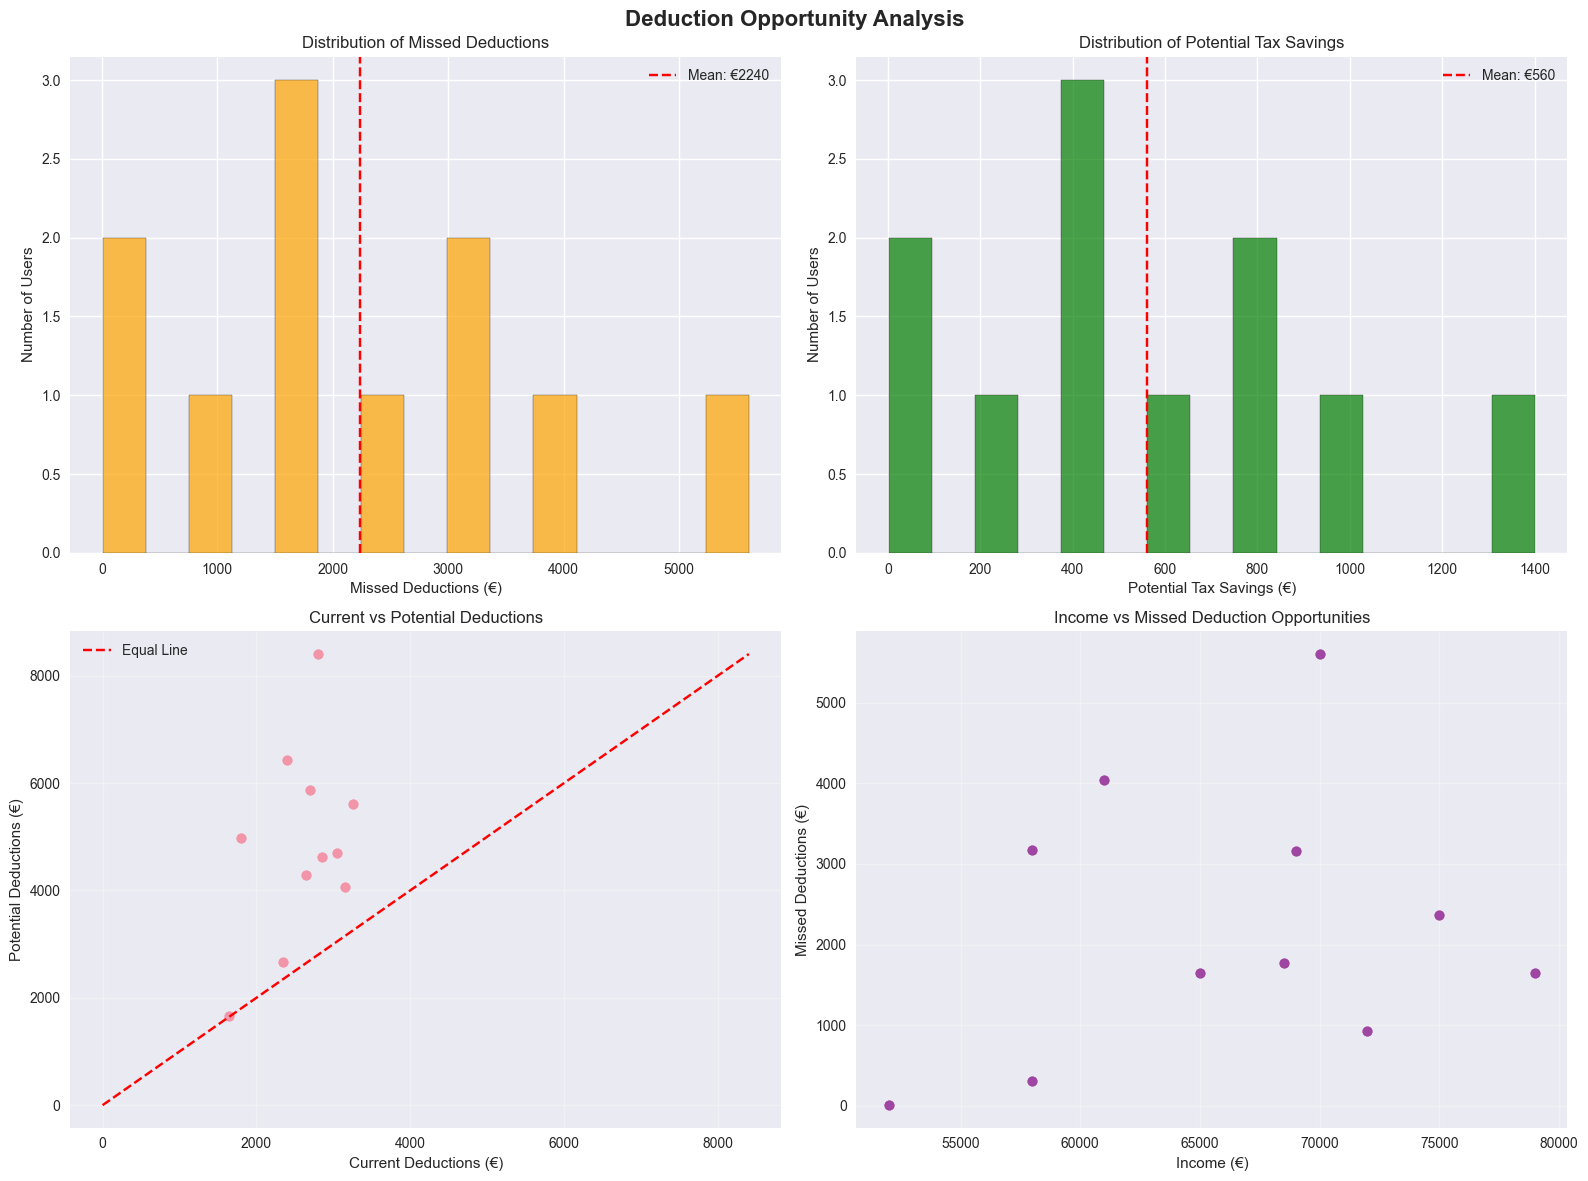


📊 Category-wise Deduction Opportunities:


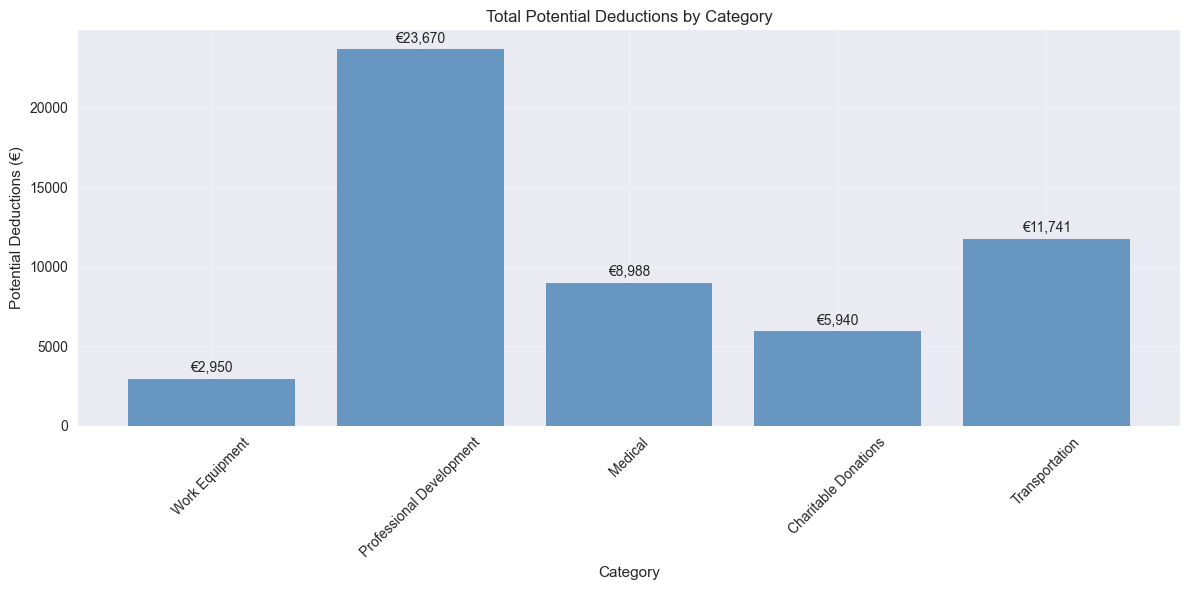

  Work Equipment: €2,949.98 total potential deductions
  Professional Development: €23,670.00 total potential deductions
  Medical: €8,988.00 total potential deductions
  Charitable Donations: €5,940.00 total potential deductions
  Transportation: €11,740.66 total potential deductions


In [30]:
# Deduction Opportunity Analysis
print("💡 Deduction Opportunity Analysis\n")

# Define deductible categories and their rules
deduction_rules = {
    'Work Equipment': {'rate': 1.0, 'min_amount': 50, 'max_annual': 800},
    'Professional Development': {'rate': 1.0, 'min_amount': 100, 'max_annual': 4000},
    'Medical': {'rate': 0.8, 'min_amount': 100, 'max_annual': None},
    'Charitable Donations': {'rate': 1.0, 'min_amount': 25, 'max_annual': None},
    'Transportation': {'rate': 0.6, 'min_amount': 200, 'max_annual': 2000}
}

print("📋 Deduction Rules:")
for category, rules in deduction_rules.items():
    max_annual = rules['max_annual'] if rules['max_annual'] else 'No limit'
    print(f"  {category}: {rules['rate']*100:.0f}% deductible, min €{rules['min_amount']}, max {max_annual}")

# Calculate deduction opportunities for each user
deduction_opportunities = []

for user_id in users_df['user_id']:
    user_transactions = transactions_df[transactions_df['user_id'] == user_id]
    user_tax_data = tax_filings_df[tax_filings_df['user_id'] == user_id]
    
    if user_tax_data.empty:
        continue
        
    current_income = user_tax_data.iloc[0]['total_income']
    current_deductions = user_tax_data.iloc[0]['total_deductions']
    
    total_potential_deductions = 0
    category_opportunities = {}
    
    for category, rules in deduction_rules.items():
        category_spending = user_transactions[user_transactions['category'] == category]['amount'].sum()
        
        if category_spending >= rules['min_amount']:
            potential_deduction = category_spending * rules['rate']
            if rules['max_annual']:
                potential_deduction = min(potential_deduction, rules['max_annual'])
            
            total_potential_deductions += potential_deduction
            category_opportunities[category] = {
                'spending': category_spending,
                'potential_deduction': potential_deduction,
                'tax_benefit': potential_deduction * 0.25  # Rough estimate
            }
    
    if total_potential_deductions > current_deductions:
        missed_deductions = total_potential_deductions - current_deductions
        deduction_opportunities.append({
            'user_id': user_id,
            'current_income': current_income,
            'current_deductions': current_deductions,
            'potential_deductions': total_potential_deductions,
            'missed_deductions': missed_deductions,
            'potential_tax_savings': missed_deductions * 0.25,
            'category_opportunities': category_opportunities
        })

# Convert to DataFrame for analysis
opportunities_df = pd.DataFrame(deduction_opportunities)

if not opportunities_df.empty:
    print(f"\n🎯 Deduction Opportunities Found for {len(opportunities_df)} users")
    print(f"Total missed deductions: €{opportunities_df['missed_deductions'].sum():,.2f}")
    print(f"Total potential tax savings: €{opportunities_df['potential_tax_savings'].sum():,.2f}")
    
    # Top opportunities
    top_opportunities = opportunities_df.nlargest(5, 'potential_tax_savings')
    print("\n🏆 Top 5 Deduction Opportunities:")
    display(top_opportunities[['user_id', 'current_deductions', 'potential_deductions', 'missed_deductions', 'potential_tax_savings']].round(2))
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Deduction Opportunity Analysis', fontsize=16, fontweight='bold')
    
    # Distribution of missed deductions
    axes[0, 0].hist(opportunities_df['missed_deductions'], bins=15, color='orange', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Missed Deductions (€)')
    axes[0, 0].set_ylabel('Number of Users')
    axes[0, 0].set_title('Distribution of Missed Deductions')
    axes[0, 0].axvline(opportunities_df['missed_deductions'].mean(), color='red', linestyle='--', 
                      label=f'Mean: €{opportunities_df["missed_deductions"].mean():.0f}')
    axes[0, 0].legend()
    
    # Potential tax savings
    axes[0, 1].hist(opportunities_df['potential_tax_savings'], bins=15, color='green', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('Potential Tax Savings (€)')
    axes[0, 1].set_ylabel('Number of Users')
    axes[0, 1].set_title('Distribution of Potential Tax Savings')
    axes[0, 1].axvline(opportunities_df['potential_tax_savings'].mean(), color='red', linestyle='--',
                      label=f'Mean: €{opportunities_df["potential_tax_savings"].mean():.0f}')
    axes[0, 1].legend()
    
    # Current vs Potential Deductions
    axes[1, 0].scatter(opportunities_df['current_deductions'], opportunities_df['potential_deductions'], alpha=0.7)
    max_val = max(opportunities_df['potential_deductions'].max(), opportunities_df['current_deductions'].max())
    axes[1, 0].plot([0, max_val], [0, max_val], 'r--', label='Equal Line')
    axes[1, 0].set_xlabel('Current Deductions (€)')
    axes[1, 0].set_ylabel('Potential Deductions (€)')
    axes[1, 0].set_title('Current vs Potential Deductions')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Income vs Missed Deductions
    axes[1, 1].scatter(opportunities_df['current_income'], opportunities_df['missed_deductions'], alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('Income (€)')
    axes[1, 1].set_ylabel('Missed Deductions (€)')
    axes[1, 1].set_title('Income vs Missed Deduction Opportunities')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Category-wise opportunities
    print("\n📊 Category-wise Deduction Opportunities:")
    category_totals = {}
    for category in deduction_rules.keys():
        category_total = 0
        for _, row in opportunities_df.iterrows():
            if category in row['category_opportunities']:
                category_total += row['category_opportunities'][category]['potential_deduction']
        if category_total > 0:
            category_totals[category] = category_total
    
    if category_totals:
        plt.figure(figsize=(12, 6))
        categories = list(category_totals.keys())
        amounts = list(category_totals.values())
        
        plt.bar(categories, amounts, color='steelblue', alpha=0.8)
        plt.title('Total Potential Deductions by Category')
        plt.xlabel('Category')
        plt.ylabel('Potential Deductions (€)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        for i, amount in enumerate(amounts):
            plt.text(i, amount + max(amounts)*0.01, f'€{amount:,.0f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        for category, amount in category_totals.items():
            print(f"  {category}: €{amount:,.2f} total potential deductions")
else:
    print("ℹ️ No significant deduction opportunities identified in the current dataset.")

In [31]:
# Key Insights and Recommendations
print("🎯 Key Insights and Recommendations\n")

# Summary of key findings
insights = {
    'Data Overview': {
        'Total Users': len(users_df),
        'Total Transactions': len(transactions_df),
        'Total Transaction Value': f"€{transactions_df['amount'].sum():,.2f}",
        'Average Transaction': f"€{transactions_df['amount'].mean():.2f}",
        'Date Range': f"{transactions_df['transaction_date'].min().strftime('%Y-%m-%d')} to {transactions_df['transaction_date'].max().strftime('%Y-%m-%d')}"
    },
    'Spending Patterns': {
        'Top Category by Volume': transactions_df['category'].value_counts().index[0],
        'Top Category by Amount': transactions_df.groupby('category')['amount'].sum().idxmax(),
        'Most Active Month': monthly_spending.loc[monthly_spending['sum'].idxmax(), 'month_name'],
        'December Charitable Giving': f"€{charitable_december['amount'].sum():.2f}" if not charitable_december.empty else "€0"
    },
    'Demographics': {
        'Most Common Occupation': users_df['occupation_category'].value_counts().index[0],
        'Most Common Age Range': users_df['age_range'].value_counts().index[0],
        'Most Common Family Status': users_df['family_status'].value_counts().index[0],
        'Most Common Region': users_df['region'].value_counts().index[0]
    },
    'Tax Efficiency': {
        'Average Deduction Rate': f"{tax_analysis['deduction_rate'].mean():.1f}%",
        'Users with Deduction Gaps': len(tax_comparison[tax_comparison['deduction_gap'] > 100]),
        'Total Missed Deductions': f"€{tax_comparison[tax_comparison['deduction_gap'] > 0]['deduction_gap'].sum():,.2f}",
        'Average Income': f"€{tax_analysis['total_income'].mean():,.2f}"
    }
}

if not opportunities_df.empty:
    insights['Optimization Opportunities'] = {
        'Users with Opportunities': len(opportunities_df),
        'Total Potential Savings': f"€{opportunities_df['potential_tax_savings'].sum():,.2f}",
        'Average Opportunity per User': f"€{opportunities_df['potential_tax_savings'].mean():.2f}",
        'Largest Single Opportunity': f"€{opportunities_df['potential_tax_savings'].max():.2f}"
    }

print("📊 COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 50)

for section, data in insights.items():
    print(f"\n🔍 {section}:")
    for key, value in data.items():
        print(f"  • {key}: {value}")

# Key recommendations
print("\n\n💡 KEY RECOMMENDATIONS")
print("=" * 50)

recommendations = [
    "🎯 Focus on users with significant deduction gaps (>€100) for immediate tax optimization",
    "📅 Implement year-round charitable giving strategies instead of December concentration",
    "🏢 Develop occupation-specific tax optimization programs based on spending patterns",
    "📍 Create regional tax advisory services based on local spending and income patterns",
    "🔄 Implement automated expense tracking for deductible categories",
    "📊 Use clustering insights to create personalized tax optimization recommendations",
    "⏰ Develop seasonal tax planning strategies based on monthly spending patterns",
    "📋 Create category-specific deduction maximization guides",
    "🎓 Offer tax education programs for users with low deduction efficiency",
    "🤖 Implement AI-driven alerts for potential deduction opportunities"
]

for i, recommendation in enumerate(recommendations, 1):
    print(f"{i:2d}. {recommendation}")

# Technical implementation priorities
print("\n\n🛠️ TECHNICAL IMPLEMENTATION PRIORITIES")
print("=" * 50)

technical_priorities = [
    "📄 Document AI integration for automated receipt and payslip processing",
    "🔍 Similarity search engine for finding related transactions and patterns",
    "💡 Intelligent tip generation system based on pattern analysis",
    "📊 Real-time dashboard for tax optimization tracking",
    "🔔 Automated alert system for deduction opportunities",
    "📱 Mobile app for expense tracking and categorization",
    "🤝 Integration with accounting software and financial institutions",
    "📈 Predictive analytics for tax planning"
]

for i, priority in enumerate(technical_priorities, 1):
    print(f"{i}. {priority}")

print("\n\n✅ PATTERN RECOGNITION ANALYSIS COMPLETED")
print("📊 All insights and recommendations are ready for implementation in the tax optimization system.")

🎯 Key Insights and Recommendations

📊 COMPREHENSIVE ANALYSIS SUMMARY

🔍 Data Overview:
  • Total Users: 20
  • Total Transactions: 1044
  • Total Transaction Value: €354,912.99
  • Average Transaction: €339.95
  • Date Range: 2022-01-05 to 2023-12-31

🔍 Spending Patterns:
  • Top Category by Volume: Transportation
  • Top Category by Amount: Self-Employment
  • Most Active Month: January
  • December Charitable Giving: €7740.00

🔍 Demographics:
  • Most Common Occupation: IT Professional
  • Most Common Age Range: 30-40
  • Most Common Family Status: Married with children
  • Most Common Region: Berlin

🔍 Tax Efficiency:
  • Average Deduction Rate: 4.0%
  • Users with Deduction Gaps: 28
  • Total Missed Deductions: €86,277.48
  • Average Income: €71,062.50

🔍 Optimization Opportunities:
  • Users with Opportunities: 11
  • Total Potential Savings: €6,159.66
  • Average Opportunity per User: €559.97
  • Largest Single Opportunity: €1400.90


💡 KEY RECOMMENDATIONS
 1. 🎯 Focus on users wi

In [32]:
# Save Analysis Results
print("💾 Saving Analysis Results\n")

# Create results directory
results_dir = Path('./results')
results_dir.mkdir(exist_ok=True)

# Prepare comprehensive patterns dictionary
patterns_export = {
    'transaction_patterns': {
        'category_statistics': category_analysis.to_dict(),
        'monthly_spending': monthly_spending.to_dict('records'),
        'seasonal_trends': {
            'december_charitable': float(charitable_december['amount'].sum()) if not charitable_december.empty else 0,
            'quarterly_patterns': quarterly_spending.to_dict()
        }
    },
    'demographic_patterns': {
        'spending_by_occupation': occupation_spending.to_dict(),
        'spending_by_family_status': family_spending.to_dict(),
        'spending_by_region': region_spending.to_dict()
    },
    'tax_optimization_patterns': {
        'deduction_gap_analysis': {
            'users_with_gap': int(len(tax_comparison[tax_comparison['deduction_gap'] > 100])),
            'average_gap': float(tax_comparison['deduction_gap'].mean()),
            'total_missed_deductions': float(tax_comparison[tax_comparison['deduction_gap'] > 0]['deduction_gap'].sum())
        },
        'deduction_efficiency': tax_analysis['deduction_rate'].describe().to_dict()
    },
    'clustering_patterns': {
        'optimal_clusters': int(optimal_k),
        'cluster_analysis': {f'cluster_{i}': {
            'size': int(cluster_analysis[f'Cluster {i}']['size']),
            'avg_income': float(cluster_analysis[f'Cluster {i}']['avg_income']),
            'avg_spending': float(cluster_analysis[f'Cluster {i}']['avg_spending']),
            'avg_deduction_rate': float(cluster_analysis[f'Cluster {i}']['avg_deduction_rate']),
            'dominant_occupation': cluster_analysis[f'Cluster {i}']['dominant_occupation']
        } for i in range(optimal_k)},
        'user_clusters': user_features[['user_id', 'cluster']].to_dict('records')
    },
    'deduction_opportunities': opportunities_df.to_dict('records') if not opportunities_df.empty else [],
    'key_insights': insights
}

# Save patterns to JSON
with open(results_dir / 'patterns.json', 'w') as f:
    json.dump(patterns_export, f, indent=2, default=str)

print(f"✅ Patterns saved to {results_dir / 'patterns.json'}")

# Save processed DataFrames
user_features.to_csv(results_dir / 'user_features.csv', index=False)
tax_comparison.to_csv(results_dir / 'tax_comparison.csv', index=False)
user_transactions.to_csv(results_dir / 'user_transactions_enriched.csv', index=False)

if not opportunities_df.empty:
    opportunities_df.to_csv(results_dir / 'deduction_opportunities.csv', index=False)
    print(f"✅ Deduction opportunities saved to {results_dir / 'deduction_opportunities.csv'}")

print(f"✅ User features saved to {results_dir / 'user_features.csv'}")
print(f"✅ Tax comparison saved to {results_dir / 'tax_comparison.csv'}")
print(f"✅ Enriched transactions saved to {results_dir / 'user_transactions_enriched.csv'}")

# Create summary report
summary_report = f"""
# Tax Document Processing - Pattern Recognition Analysis Report

Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

## Data Overview
- Total Users: {len(users_df)}
- Total Transactions: {len(transactions_df)}
- Transaction Value: €{transactions_df['amount'].sum():,.2f}
- Analysis Period: {transactions_df['transaction_date'].min().strftime('%Y-%m-%d')} to {transactions_df['transaction_date'].max().strftime('%Y-%m-%d')}

## Key Findings

### Spending Patterns
- Top spending category: {transactions_df.groupby('category')['amount'].sum().idxmax()}
- Most active month: {monthly_spending.loc[monthly_spending['sum'].idxmax(), 'month_name']}
- December charitable giving: €{charitable_december['amount'].sum():.2f}

### Demographics
- Primary occupation: {users_df['occupation_category'].value_counts().index[0]}
- Common age range: {users_df['age_range'].value_counts().index[0]}
- Common family status: {users_df['family_status'].value_counts().index[0]}

### Tax Optimization
- Average deduction rate: {tax_analysis['deduction_rate'].mean():.1f}%
- Users with deduction gaps: {len(tax_comparison[tax_comparison['deduction_gap'] > 100])}
- Total missed deductions: €{tax_comparison[tax_comparison['deduction_gap'] > 0]['deduction_gap'].sum():,.2f}

### User Clustering
- Optimal clusters identified: {optimal_k}
- Silhouette score: {max(silhouette_scores):.3f}

### Deduction Opportunities
"""

if not opportunities_df.empty:
    summary_report += f"""
- Users with opportunities: {len(opportunities_df)}
- Total potential savings: €{opportunities_df['potential_tax_savings'].sum():,.2f}
- Average opportunity: €{opportunities_df['potential_tax_savings'].mean():.2f}
"""
else:
    summary_report += "- No significant opportunities identified\n"

summary_report += """

## Files Generated
- patterns.json: Comprehensive pattern analysis results
- user_features.csv: User feature matrix with clustering results
- tax_comparison.csv: Tax deduction gap analysis
- user_transactions_enriched.csv: Transactions with demographic data
"""

if not opportunities_df.empty:
    summary_report += "- deduction_opportunities.csv: Detailed deduction opportunities\n"

with open(results_dir / 'analysis_report.md', 'w') as f:
    f.write(summary_report)

print(f"✅ Summary report saved to {results_dir / 'analysis_report.md'}")

print("\n🎉 Pattern Recognition Analysis Complete!")
print(f"📁 All results saved in: {results_dir.absolute()}")
print("📊 Ready for integration with the tax optimization system.")

💾 Saving Analysis Results

✅ Patterns saved to results\patterns.json
✅ Deduction opportunities saved to results\deduction_opportunities.csv
✅ User features saved to results\user_features.csv
✅ Tax comparison saved to results\tax_comparison.csv
✅ Enriched transactions saved to results\user_transactions_enriched.csv
✅ Summary report saved to results\analysis_report.md

🎉 Pattern Recognition Analysis Complete!
📁 All results saved in: c:\Users\Bogdan\Documents\git\tax-cp\results
📊 Ready for integration with the tax optimization system.
